# Raices de funciones no lineales

## 1. Método de Ridder

El método de Ridder es funcional para encontrar raices de funciones no lineales. Este se apoya en métodos conocidos y de fácil compresión como Bisección y Regula Falsi. Utiliza Bisección para realizar una primera aproximación a la raíz en $f(x)$ denominando a ese valor como $x_3$ el cual será de utilidad para encontrar una función $g(x) = f(x)e^{hQ}$. Definiendo los puntos $(x_1, g(x_1)) = a$, $(x_2, g(x_2)) = b$ y $(x_3, g(x_3)) = c$ y la recta $R \in g(x)$. Se debe cumplir entonces:

* $a, b, c \in R$
* $g(x_3) = \frac{g(x_1) + g(x_2)}{2}$

Analizando a partir de las condiciones anteriores, la función $g(x)$ cumple lo siguiente: 
\begin{equation}
    g(x_1) = f(x_1)e^{0.Q}
    \label{g(x_1)}
\end{equation}
\begin{equation}
    g(x_2) = f(x_2)e^{2h.Q}
    \label{g(x_2)}
\end{equation}
\begin{equation}
    g(x_3) = f(x_3)e^{h.Q}
    \label{g(x_3)}
\end{equation}


Ya que la función $g(x)$ muestra una tendencia lineal en el intérvalo $[x_1, x_2]$ y dentro de este intérvalo existe una raíz real que se aproxima a la que buscamos en $f(x)$ se procede a aplicar Regula Falsi en $g(x)$ para encontrar un valor $x_4$ de la siguiente manera: 

\begin{equation}
    x_4 = x_3 - \frac{g(x_3)(x_3 - x_1)}{g(x_3) - g(x_1)}
    \label{root}
\end{equation}

Sustituyendo las expresiones \ref{g(x_1)}, \ref{g(x_2)} y \ref{g(x_3)} en \ref{root} para que quede en función de $f(x)$

\begin{equation}
    x_4 = x_3 \pm (x_3 - x_1) \frac{f(x_3)}{\sqrt{f^2(x_3) - f(x_1)f(x_2)}}
    \label{root2}
\end{equation}

La ecuación \ref{root2} es la que se implementará en el programa para encontrar la mejor aproximación en cada iteración.

### 1.1 Ejemplo práctico

Encontrar mediante el método de Ridder la raíz de la función $f(x) = 1/2 - cos(x)$ con una tolerancia de $1x10^{-9}$ para el error absoluto, tal que $x \in [0, \pi]$ 
Definimos la función y el intérvalo inicial:

In [105]:
import math
import pandas as pd
import os as os

a = 0
b = math.pi
# x**2 -2
f = lambda x: 1/2 - math.cos(x)
TOL = 1e-9
table = {"n":[],
        "a":[],
        "b":[],
        "f(a)":[],
        "f(b)":[],
        "c":[],
        "f(c)":[],
        "f(a)-f(b)":[],
        "d":[],
        "f(d)":[],
        "ERROR":[]}

#### Función Ridder

In [106]:
def ridder (f, a, b, TOL):
    c = 0.5 * (a + b)
    oldRoot = c
    n = 1
    
    while True:
        # Realizando iteración del método
        c = 0.5 * (a + b)
        if f(a) - f(b) > 0:
            d = c+(c-a)*f(c)/math.sqrt(f(c)**2-f(a)*f(b))
        else:
            d = c-(c-a)*f(c)/math.sqrt(f(c)**2-f(a)*f(b))
        
        # Guardando datos de cada iteración en una tabla
        table["n"].append(n)
        table["a"].append(a)
        table["b"].append(b)
        table["f(a)"].append(f(a))
        table["f(b)"].append(f(b))
        table["c"].append(c)
        table["f(c)"].append(f(c))
        table["f(a)-f(b)"].append(f(a)-f(b))
        table["d"].append(d)
        table["f(d)"].append(f(d))
        table["ERROR"].append(abs(oldRoot-d))
              
        # Encontrando el nuevo intérvalo
        if f(c) * f(d) <= 0:
            if c < d: 
                a = c
                b = d
            else:
                a = d
                b = c
        else:
            if f(b) * f(d) < 0:
                a = d
            else: 
                b = d
        
        # Evaluando error
        if abs(oldRoot - d) <= TOL:
            break
        oldRoot = d
        n+=1
        
            
    return d

Al tener ya definido el intérvalo y la función a utilizar solamente queda como último paso el llamar la función ridder con los parámetros necesarios, en este caso: f, a, b, TOL

In [107]:
ridder(f, a, b, TOL)


1.0471975511965979

### 1.1 Visualización de iteraciones
Si deseamos ver los valores que se obtienen con cada iteración entonces lo podemos visualizar con el siguiente código:

In [108]:
df = pd.DataFrame(table)
display(df)

,n,a,b,f(a),f(b),c,f(c),f(a)-f(b),d,f(d),ERROR
0,1,0.000000,3.141593,-5.000000e-01,1.500000,1.570796,0.500000,-2.000000,0.785398,-2.071068e-01,7.853982e-01
1,2,0.785398,1.570796,-2.071068e-01,0.500000,1.178097,0.117317,-0.707107,1.043592,-3.119333e-03,2.581937e-01
2,3,1.043592,1.178097,-3.119333e-03,0.117317,1.110845,0.056095,-0.120436,1.047191,-5.266679e-06,3.599575e-03
3,4,1.047191,1.110845,-5.266679e-06,0.056095,1.079018,0.027806,-0.056100,1.047198,-2.190126e-09,6.078919e-06
4,5,1.047198,1.079018,-2.190126e-09,0.027806,1.063108,0.013841,-0.027806,1.047198,-2.293721e-13,2.528675e-09
5,6,1.047198,1.063108,-2.293721e-13,0.013841,1.055153,0.006905,-0.013841,1.047198,1.110223e-16,2.648992e-13


### 1.2 Visualización de gráficas
Para entender de una mejor manera cómo funciona el método, visualicemos las gráficas de ambas funciones: $f(x)$ y $g(x)$.

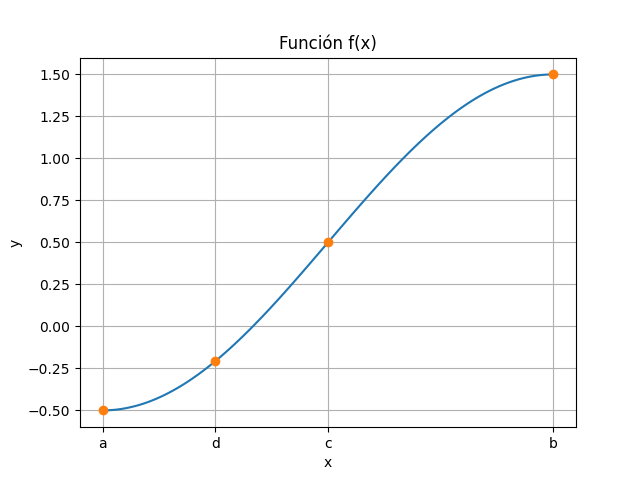

In [109]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(a, b, 100)
c = (a+b)*0.5
d = c-(c-a)*f(c)/math.sqrt(f(c)**2-f(a)*f(b)) # first iteration

plt.plot(x, [f(i) for i in x], label = 'f(x)')
plt.plot([a, b, c, d],[f(a), f(b), f(c), f(d)], 'o')
plt.xticks([a, b, c, d], ['a', 'b', 'c', 'd'])
plt.xlabel('x')
plt.ylabel('y')
plt.title("Función f(x)")
plt.grid()
plt.show()

Ahora para encontrar $g(x)$ debemos encontrar el factor $e^{hQ}$ por medio de las ecuaciones \ref{g(x_1)}, \ref{g(x_2)}, y \ref{g(x_3)}, y la restricción $g(x_3) = \frac{g(x_1) + g(x_2)}{2}$, obteniendo la siguiente expresión: 

\begin{equation}
    e^{hQ} = \frac{f(x_3) \pm \sqrt{f^2(x_3) - f(x_2)f(x_1)}}{f(x_2)}
    \label{k}
\end{equation}


In [110]:
def exponentialFactor (f, a, b, c):
    if f(b) > 0:
        k = (f(c) + math.sqrt(f(c)**2 - f(a)*f(b)))/f(b)
    else:
        k = (f(c) - math.sqrt(f(c)**2 - f(a)*f(b)))/f(b)
    return k


Ya que la nueva función que buscamos es de tendencia lineal, podemos aplicar interpolación lineal para encontrar una aproximación óptima. 

In [111]:
h = (b - a)/2
k = exponentialFactor(f, a, b, c)
Q = np.log(k)

# g(a) = f(a)
# g(c) = f(c)*e^{h*Q}
# g(b) = f(b)*e^{2*h*Q}

# Using linear interpolation between a and b
# g = lambda x: ((f(b)*math.exp(2*h*Q) - f(a))/(b-a))*(x-c) + f(c)*k

# Using Lagrange polynomial of first degree
# g = lambda x: (x-c)*f(a)/((a-c)) + (x-a)*f(c)*k/((c-a)) + (x-a)*f(b)*math.exp(2*h*Q)/((b-a))

# Using Lagrange polynomial of second degree
# g = lambda x: (x-c)*(x-b)*f(a)/((a-c)*(a-b)) + (x-a)*(x-b)*f(c)*k/((c-a)*(c-b)) + (x-a)*(x-c)*f(b)*math.exp(2*h*Q)/((b-a)*(b-c))

True
0.0


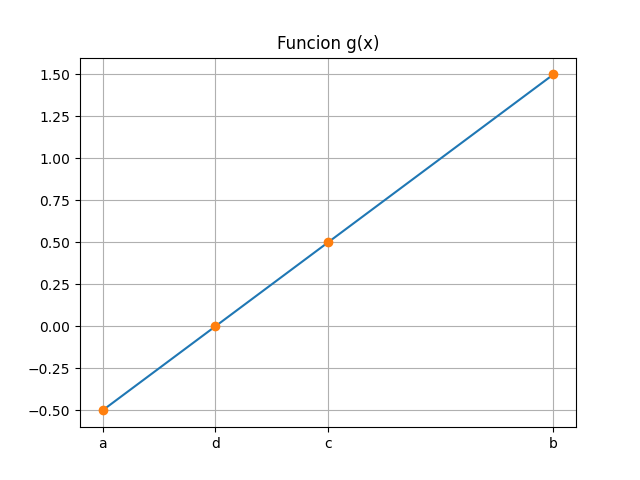

In [112]:
dSample = c - (g(c)*(c - a))/(g(c) - g(a)) # finding the 'x' that satisfies the Regula Falsi method

# Evaluating wether if g(x) satisfies the first constraint
# 0 = f(a) - 2*f(c)*e^{hQ} + f(b)*e^{2*hQ}
if f(a)-2*f(c)*k+f(b)*math.exp(2*h*Q) == 0:
    print ('True')
else:
    print ('False')
    
print(f(a)-2*f(c)*k+f(b)*math.exp(2*h*Q))

plt.plot(x, [g(i) for i in x])
plt.plot([a, b, c, d], [g(a), g(b), g(c), g(d)], 'o')
plt.xticks([a, b, c, d], ['a', 'b', 'c', 'd'])
plt.title("Funcion g(x)")
plt.grid()
plt.show()

### 1.3 Análisis del error

0.024427869639645772
0.017370367385204595
0.06021108985382638
0.3812642292721695
---------------
0.09665471123016925


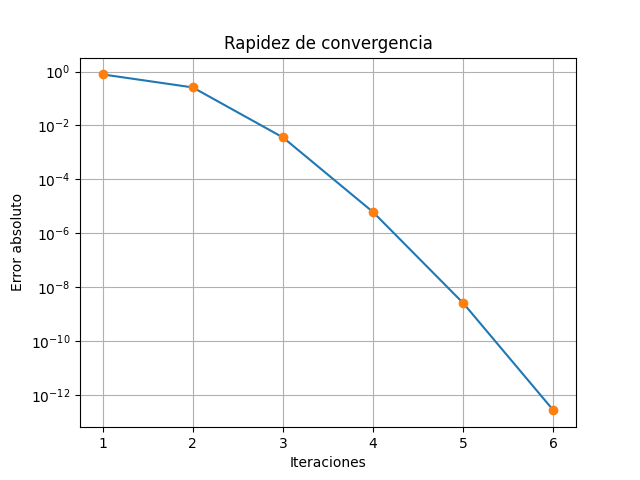

In [113]:
length = len(table["ERROR"])
sum = 0
for i in range(1, length-1):
    l = table["ERROR"][i+1]/(table["ERROR"][i])**math.sqrt(2)
    print(l)
    sum += l
avg = sum / (length - 1)
print("---------------")
print(avg)

plt.plot(table["n"], table["ERROR"])
plt.plot(table["n"], table["ERROR"], 'o')
plt.grid()
plt.title("Rapidez de convergencia")
plt.xlabel("Iteraciones")
plt.ylabel("Error absoluto")
plt.yscale("log")
plt.show()

## 2. Método de Brent-Dekker